In [1]:
%matplotlib inline
import numpy as np
import math
import matplotlib.pyplot as plt
import string
import pandas as pd
import re

In [41]:
job_dict = pd.read_csv("Jobs Dictionary.csv")
job_dict.head()

,Unnamed: 0,Job,Minor Category,Major Category
0,0,zookeeper,Sciences,Non_Business
1,1,zoologis,Sciences,Non_Business
2,2,xylophonist,Arts,Non_Business
3,3,waiter,LowStat,Low_Status
4,4,waitress,LowStat,Low_Status


In [5]:
data = pd.read_csv("bio_guide_bios_jobs.csv")

In [30]:
data = data[['last_name', 'first_name', 'birthday', 'gender', 'type', 'state', 'district', 'senate_class', 'party', 'bioguide_id', 'icpsr_id', 'govtrack_id', '0']]
data = data.rename(columns={'0': 'Biography'})

In [31]:
data.head()

,last_name,first_name,birthday,gender,type,state,district,senate_class,party,bioguide_id,icpsr_id,govtrack_id,Biography
0,Bassett,Richard,1745-04-02,M,sen,DE,NaN,2.0,Anti-Administration,B000226,507.0,401222,"BASSETT, Richard, (grandfather of Richard Henr..."
1,Bland,Theodorick,1742-03-21,M,rep,VA,9.0,NaN,NaN,B000546,786.0,401521,"BLAND, Theodorick, (nephew of Richard Bland), ..."
2,Burke,Aedanus,1743-06-16,M,rep,SC,2.0,NaN,NaN,B001086,1260.0,402032,"BURKE, Aedanus, a Representative from South Ca..."
3,Carroll,Daniel,1730-07-22,M,rep,MD,6.0,NaN,NaN,C000187,1538.0,402334,"CARROLL, Daniel, (uncle of Richard Brent, cous..."
4,Clymer,George,1739-03-16,M,rep,PA,-1.0,NaN,NaN,C000538,1859.0,402671,"CLYMER, George, a Delegate and a Representativ..."


In [20]:
jobs = job_dict['Job']
jobs

0             zookeeper
1              zoologis
2           xylophonist
3                waiter
4              waitress
             ...       
351              dealer
352        construction
353         agriculture
354    Attorney General
355    attorney general
Name: Job, Length: 356, dtype: object

In [21]:
cleaned_split_jobs = []
for job in jobs: 
    split_job = job.split()
    cleaned_split_jobs.extend(split_job)

In [35]:
#create a list of jobs with more tha one word
compound_jobs = [job for job in jobs if len(job.split()) > 1]

In [32]:
compound_split_jobs = []
for job in jobs: 
    split_job = job.split()
    if len(split_job) > 1:
        compound_split_jobs.extend(split_job)

In [37]:
#Set data types in the dataset
data['Matched Jobs'] = pd.Series()
data['Matched Jobs'] = data['Matched Jobs'].astype(object)
data['Biography'] = data['Biography'].astype(str)

In [93]:
#loop over bioguide biographies and extract jobs, add them to "Matched Jobs" column
for row_index in range(len(data['last_name'])):
    person_string = data.loc[row_index, 'Biography'].split()
    cleaned_string = [re.sub(r'[^\w\s]','',word) for word in person_string]
    person_jobs = [i for i in cleaned_string if i in cleaned_split_jobs]
    compound_job_intersection = [i for i in person_jobs if i in compound_split_jobs]
    if compound_job_intersection != []: 
        for job in compound_job_intersection:
            double_split_person_string = [[cleaned_string[i], cleaned_string[i+1]] for i in range(len(cleaned_string) - 1)]
            matched_doubles = [" ".join(i) for i in double_split_person_string if " ".join(i) in compound_jobs]    
            matched_doubles = set(matched_doubles)
            jobs_excluding_intersection = [i for i in person_jobs if i not in compound_job_intersection]
            if len(matched_doubles) > 0:
                jobs_excluding_intersection.extend(matched_doubles)
    data.loc[row_index, 'Matched Jobs'] = [[jobs_excluding_intersection]]

In [115]:
#assign major (ie: finest) categories to each politician
data['Major Category'] = pd.Series()
for row_index in range(len(data['last_name'])):
    person_jobs = [i for i in data.loc[row_index, 'Matched Jobs'][0]]
    person_major_cats = set([job_dict.loc[job_dict['Job'] == job, 'Major Category'].values[0] for job in person_jobs])
    data.loc[row_index, 'Major Category'] = [person_major_cats]

In [116]:
#assign minor (ie: coarsest) categories to each politician
data['Minor Category'] = pd.Series()
for row_index in range(len(data['last_name'])):
    person_jobs = [i for i in data.loc[row_index, 'Matched Jobs'][0]]
    person_major_cats = set([job_dict.loc[job_dict['Job'] == job, 'Minor Category'].values[0] for job in person_jobs])
    data.loc[row_index, 'Minor Category'] = [person_major_cats]

In [146]:
#Add indicator columns for major category
major_cats = list(set(job_dict['Major Category']))
for i in major_cats:
    data["Major Cat.: " + i] = [sum([int(j == i) for j in data.loc[rowindex, 'Major Category']]) for rowindex in range(len(data['last_name']))] 

In [159]:
#Add a column counting the number of major categories for each politician 
data['Major Cat. Count'] = [len(data.loc[rowindex, 'Major Category']) for rowindex in range(len(data['last_name']))]

In [160]:
data.head()

,last_name,first_name,birthday,gender,type,state,district,senate_class,party,bioguide_id,...,Biography,Matched Jobs,Major Category,Minor Category,Major Cat.: Non_Business,Major Cat.: Low_Status,Major Cat.: Military,Major Cat.: Legal,Major Cat.: Business,Major Cat. Count
0,Bassett,Richard,1745-04-02,M,sen,DE,NaN,2.0,Anti-Administration,B000226,...,"BASSETT, Richard, (grandfather of Richard Henr...","[[law, captain, War, justice, judge]]","{Legal, Non_Business, Military}","{Legal, Other_Unsure, Military}",1,0,1,1,0,3
1,Bland,Theodorick,1742-03-21,M,rep,VA,9.0,NaN,NaN,B000546,...,"BLAND, Theodorick, (nephew of Richard Bland), ...","[[medicine, War, Army, captain, lieutenant]]","{Non_Business, Military}","{Medical, Other_Unsure, Military}",1,0,1,0,0,2
2,Burke,Aedanus,1743-06-16,M,rep,SC,2.0,NaN,NaN,B001086,...,"BURKE, Aedanus, a Representative from South Ca...","[[War, judge, Army, law, judge]]","{Legal, Military}","{Legal, Military}",0,0,1,1,0,2
3,Carroll,Daniel,1730-07-22,M,rep,MD,6.0,NaN,NaN,C000187,...,"CARROLL, Daniel, (uncle of Richard Brent, cous...","[[executive, agricultural]]","{Non_Business, Business}","{Business, Agriculture}",1,0,0,0,1,2
4,Clymer,George,1739-03-16,M,rep,PA,-1.0,NaN,NaN,C000538,...,"CLYMER, George, a Delegate and a Representativ...","[[mercantile, captain]]","{Non_Business, Business}","{Business, Other_Unsure}",1,0,0,0,1,2


Text(0.5,1,'Frequency of Major Categories')

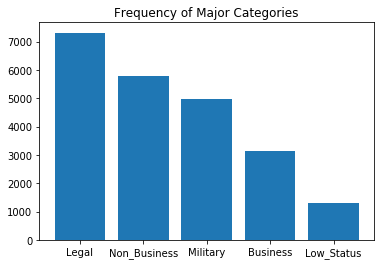

In [172]:
indicator_counts = pd.DataFrame({"Major Cat.": major_cats, "Count": [sum(data['Major Cat.: ' + cat]) for cat in major_cats]}).sort_values(by="Count", ascending=False)
plt.bar(indicator_counts["Major Cat."], indicator_counts["Count"])
plt.title("Frequency of Major Categories")

Text(0.5,1,'Number of Major Categories per Politician')

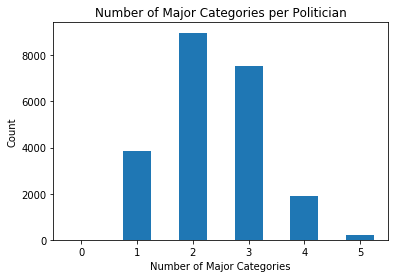

In [204]:
Major_Cat_Count_grouped = data.groupby('Major Cat. Count')['Major Cat. Count'].sum()
Major_Cat_Count_grouped.plot.bar()
plt.xticks(rotation='horizontal')
plt.xlabel('Number of Major Categories')
plt.ylabel('Count')
plt.title('Number of Major Categories per Politician')

In [206]:
#Correlation matrix between major category indicators
indicators = data[['Major Cat.: Non_Business', 'Major Cat.: Low_Status', 'Major Cat.: Military', 'Major Cat.: Legal', 'Major Cat.: Business']]
indicators.cov()

,Major Cat.: Non_Business,Major Cat.: Low_Status,Major Cat.: Military,Major Cat.: Legal,Major Cat.: Business
Major Cat.: Non_Business,0.249821,0.003685,0.030838,-0.044699,0.015855
Major Cat.: Low_Status,0.003685,0.096986,-0.001574,-0.004883,0.010144
Major Cat.: Military,0.030838,-0.001574,0.243452,-0.010575,-0.005528
Major Cat.: Legal,-0.044699,-0.004883,-0.010575,0.236648,-0.060337
Major Cat.: Business,0.015855,0.010144,-0.005528,-0.060337,0.194366
